In [81]:
#importing required libraries


#EDA libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data Transformation libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

#Data Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Machine Learning Models and Evaluation Metrices
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Custom Evaluation Metric
def rmse(y, y_hat):
    return np.sqrt(mean_squared_error(y, y_hat))

In [37]:
#importing the tips dataframe

tips = pd.read_csv('tips.csv')

In [38]:
tips.shape

(244, 7)

In [39]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [40]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


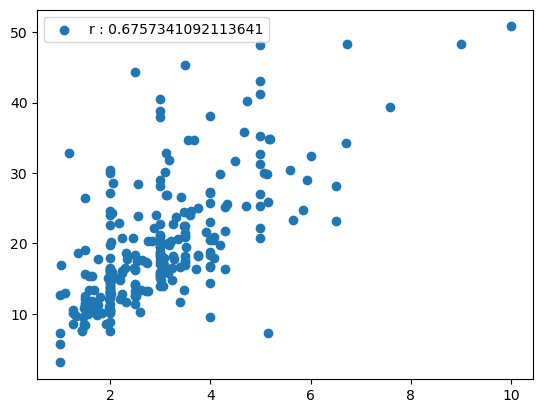

In [41]:
#finding and visualizing the correlation between the tip and total bill

r = np.corrcoef(tips['tip'], tips['total_bill'])[0,1]
plt.scatter(x = tips['tip'], y = tips['total_bill'], label = f'r : {r}')
plt.legend()
plt.show()

Distribution of total bill grouped by sex: 


        count       mean       std   min    25%    50%    75%    max
sex                                                                 
Female   87.0  18.056897  8.009209  3.07  12.75  16.40  21.52  44.30
Male    157.0  20.744076  9.246469  7.25  14.00  18.35  24.71  50.81


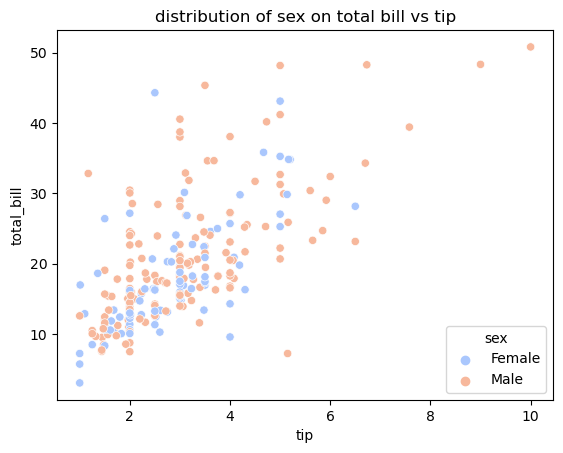

Distribution of total bill grouped by smoker: 


        count       mean       std   min     25%    50%     75%    max
smoker                                                                
No      151.0  19.188278  8.255582  7.25  13.325  17.59  22.755  48.33
Yes      93.0  20.756344  9.832154  3.07  13.420  17.92  26.860  50.81


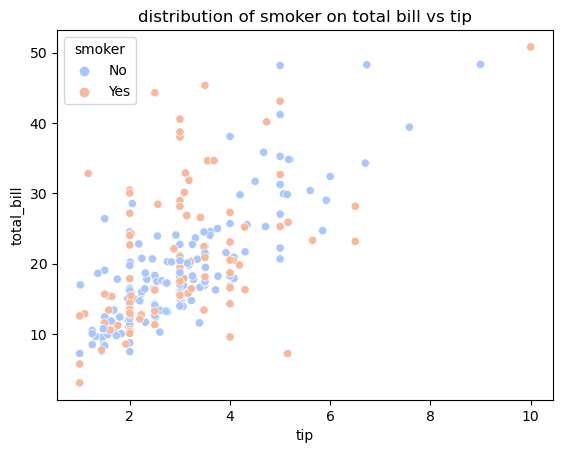

Distribution of total bill grouped by day: 


      count       mean       std   min      25%    50%      75%    max
day                                                                   
Fri    19.0  17.151579  8.302660  5.75  12.0950  15.38  21.7500  40.17
Sat    87.0  20.441379  9.480419  3.07  13.9050  18.24  24.7400  50.81
Sun    76.0  21.410000  8.832122  7.25  14.9875  19.63  25.5975  48.17
Thur   62.0  17.682742  7.886170  7.51  12.4425  16.20  20.1550  43.11


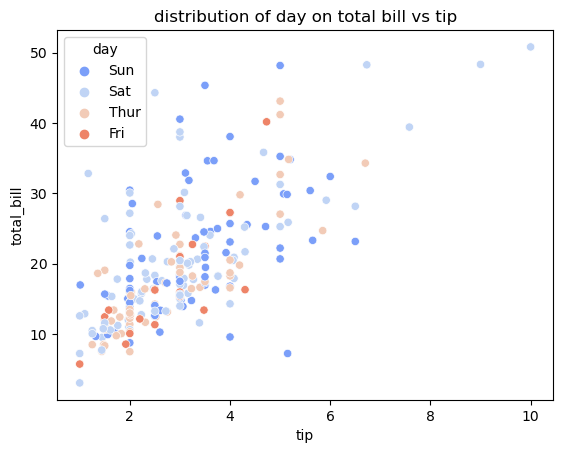

Distribution of total bill grouped by time: 


        count       mean       std   min      25%     50%      75%    max
time                                                                     
Dinner  176.0  20.797159  9.142029  3.07  14.4375  18.390  25.2825  50.81
Lunch    68.0  17.168676  7.713882  7.51  12.2350  15.965  19.5325  43.11


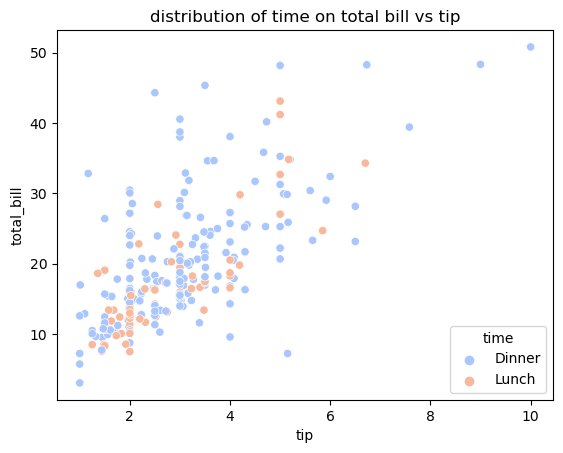

Distribution of total bill grouped by size: 


      count       mean       std    min      25%     50%      75%    max
size                                                                    
1       4.0   7.242500  3.010729   3.07   6.2050   7.915   8.9525  10.07
2     156.0  16.448013  6.043729   5.75  12.4525  15.370  19.6900  40.55
3      38.0  23.277632  9.407065  10.33  16.9400  20.365  27.7750  50.81
4      37.0  28.613514  8.608603  16.49  21.5000  25.890  34.8100  48.33
5       5.0  30.068000  7.340396  20.69  28.1500  29.850  30.4600  41.19
6       4.0  34.830000  9.382000  27.05  29.1125  32.050  37.7675  48.17


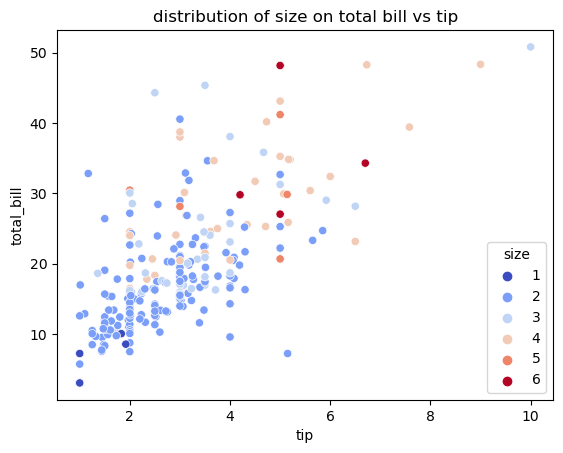

In [42]:
#finding and visualizing the how total bill varies with different catagorical values

columns = ['sex', 'smoker', 'day', 'time', 'size']
for c in columns:
    print(f'Distribution of total bill grouped by {c}: \n\n',)
    print(tips.groupby(c)['total_bill'].describe())
    sns.scatterplot(x = tips['tip'], y = tips['total_bill'], hue = tips[c], palette = 'coolwarm')
    plt.title(f'distribution of {c} on total bill vs tip')
    plt.show()

<AxesSubplot:xlabel='size', ylabel='total_bill'>

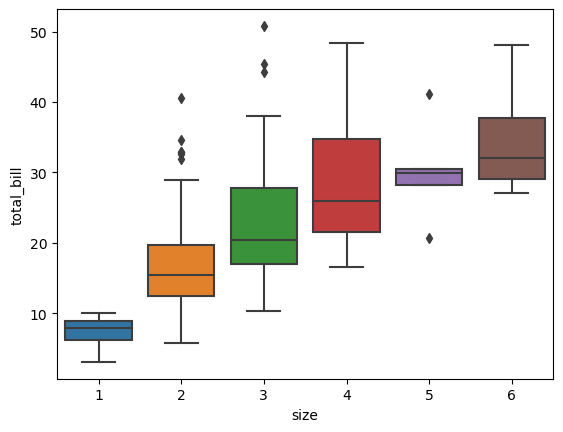

In [43]:
#checking for outliers 

sns.boxplot(y = 'total_bill', x = 'size', data = tips)

In [44]:
#removing outliers

r2 = np.where((tips['size'] == 2) & (tips['total_bill']>30))[0]
r3 = np.where((tips['size'] == 3) & (tips['total_bill']>40))[0]
r5 = np.where((tips['size'] == 5) & ((tips['total_bill']>40) | (tips['total_bill']<20)))[0]

tips.drop(index = r2, inplace = True)
tips.drop(index = r3, inplace = True)
tips.drop(index = r5, inplace = True)

tips.shape

(234, 7)

In [45]:
#converting catagorical variables to binary


map_smoker = {
    'No' : 0,
    'Yes' : 1
}

tips['smoker'] = tips['smoker'].map(map_smoker)

In [46]:
X['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [47]:
#splitting the feature and target variables

X = tips.drop('total_bill', axis = 1)
y = tips['total_bill']

In [58]:
X.tail()

,tip,sex,smoker,day,time,size
239,5.92,Male,0,Sat,Dinner,3
240,2.00,Female,1,Sat,Dinner,2
241,2.00,Male,1,Sat,Dinner,2
242,1.75,Male,0,Sat,Dinner,2
243,3.00,Female,0,Thur,Dinner,2


In [49]:
y.head()

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: total_bill, dtype: float64

In [50]:
numerical_pipeline = Pipeline([('std scaler', StandardScaler())])

nominal_pipeline = Pipeline([('one hot encoder', OneHotEncoder())])

ordinal_pipeline = Pipeline([('ordinal encoder', OrdinalEncoder()), ('std scaler', StandardScaler())])

In [51]:
num_features = ['tip']
ordinal_features = ['size']
nominal_features = ['sex', 'day', 'time']
pass_through_cols = ['smoker']

In [63]:
pipeline = ColumnTransformer([
    ('numerical pipeline', numerical_pipeline, num_features),
    ('nominal pipeline', nominal_pipeline, nominal_features),
    ('ordinal pipeline', ordinal_pipeline, ordinal_features),
    ('passing columns', 'passthrough', pass_through_cols)
])

output_cols = ['tip', 'female', 'male', 'Fri', 'Sat', 'Sun', 'Thur', 'Dinner', 'Lunch', 'size', 'smoker']

In [64]:
X_transform_ar = pipeline.fit_transform(X)
X_transform = pd.DataFrame(X_transform_ar, columns = output_cols)

In [65]:
X_transform.tail()

,tip,female,male,Fri,Sat,Sun,Thur,Dinner,Lunch,size,smoker
229,2.257460,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.454103,0.0
230,-0.727538,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.597978,1.0
231,-0.727538,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.597978,1.0
232,-0.917908,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.597978,0.0
233,0.033941,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.597978,0.0


In [66]:
#splitting the data into testing and training datasets

X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.1, random_state=42)

In [67]:
X_train.shape

(210, 11)

In [68]:
X_test.shape

(24, 11)

In [77]:
# ML

def generate_models_report(models, X_train_tr, y_train, X_test_tr, y_test):
    width = 116
    print("_"*width)
    title = "|{:^30}|{:^20}|{:^20}|{:^20}|{:^20}|"
    print(title.format("Model Name", "Train Error", "Test Error", "Train Accuracy", "Test Accuracy"))
    print("_"*width)
    row = "|{:^30}|{:^20.2f}|{:^20.2f}|{:^20.2f}|{:^20.2f}|"
    for model in models:
        model.fit(X_train_tr, y_train)
        y_hat_train = model.predict(X_train_tr)
        y_hat_test = model.predict(X_test_tr)
        train_error = rmse(y_train, y_hat_train)
        test_error = rmse(y_test, y_hat_test)
        train_accuracy = r2_score(y_train, y_hat_train)
        test_accuracy = r2_score(y_test, y_hat_test)
        model_name = str(model)
        print(row.format(model_name, train_error, test_error, train_accuracy*100, test_accuracy*100))
        print("-"*width)

In [78]:
models = [LinearRegression(), SGDRegressor(), SVR(), DecisionTreeRegressor(), RandomForestRegressor()]

In [82]:
generate_models_report(models, X_train, y_train, X_test, y_test)

____________________________________________________________________________________________________________________
|          Model Name          |    Train Error     |     Test Error     |   Train Accuracy   |   Test Accuracy    |
____________________________________________________________________________________________________________________
|      LinearRegression()      |        4.95        |        3.48        |       63.52        |       68.50        |
--------------------------------------------------------------------------------------------------------------------
|        SGDRegressor()        |        4.96        |        3.66        |       63.35        |       65.18        |
--------------------------------------------------------------------------------------------------------------------
|            SVR()             |        5.69        |        4.53        |       51.67        |       46.51        |
----------------------------------------------------------------

In [83]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [84]:
predictions = reg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill'>

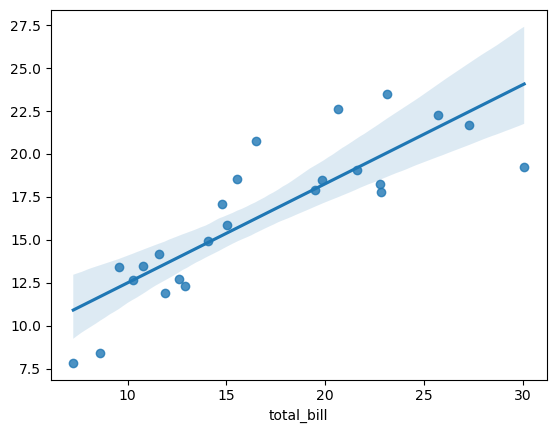

In [85]:
#plotting the predicted values against actual values

sns.regplot(y_test,predictions)

In [86]:
# Sklearn regression model evaluation functions
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [87]:
# MAE
mean_absolute_error(y_test, predictions)

2.5621575815086644

In [88]:
# RMSE
sqrt(mean_squared_error(y_test, predictions))

3.477865951086317

In [89]:
# R-Squared
r2_score(y_test, predictions)

0.6849533528882514